<a href="https://colab.research.google.com/github/lofel888/ML_code_projects/blob/main/Vrem_ryadi_dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
X = np.array([
29.0000,41.0000,45.9086,82.9764,50.1842,162.8469,191.8593,111.0904,99.0750,224.3616,
116.2578,116.9491,275.1313,117.6952,228.4903,141.2557,188.2157,163.5705,341.6737,119.8401,
248.1362,167.4857,394.8298,279.3860,509.0672,271.1141,340.5113,344.5897,377.3939,300.8403,
472.7250,296.9327,472.6368,399.2436,432.3218,455.5685,394.8581,406.6288,429.9800,487.9591,
479.1992,495.8078,580.9684,560.7369,588.8370,559.5699,615.6154,386.6111,701.0147,639.2583,
745.1451,580.9272,683.1867,610.7892,705.4340,615.6806,758.8160,548.1212,855.9842,747.3182,
730.5456,610.3668,871.4836,689.3169,766.2238,619.5603,836.9217,718.3707,825.2047,884.2796,
725.1384,954.2957,943.5638,873.9041,1102.2948,817.3666,1084.9598,914.1155,1074.5009,958.1321,
1124.3717,872.8296,1036.6171,856.8074,1125.1867,946.2893,1104.3035,959.0090,1155.7775,1158.1286,
931.0661,1109.0423,1238.3436,1217.2781,1047.9036,1395.8866,974.0951,1356.9469,1166.8223,1217.7237,
1193.3087,1237.0121,1272.3487,1315.8510,1266.2457,1454.4778,1301.1012,1295.1743,1365.5671,1329.6998,
1293.4068,1347.9442,1477.2883,1384.3932,1534.6250,1389.4182,1345.6936,1441.9758,1297.8820,1554.3925,
1446.5397,1507.4276,1337.9362,1531.8693,1691.7953,1420.5599,1657.8376,1714.6095,1472.5759,1620.0205,
1492.9250,1560.0822,1727.8511,1548.7546,1728.1283,1494.3665,1691.3756,1619.5240,1771.1205,1608.9244,
1751.6363,1805.2195,1575.2795,1822.2113,1686.9070,1723.3278,1816.6533,1799.4598,1822.2530,1870.3998,
1881.1847,1821.7198,1929.0190,1769.7292,2013.1381,1677.5822,2002.2911,1706.2916,2058.4791,1777.2912,
2016.6429,2046.2236,1892.6964,1931.0038,2058.6323,2087.5352,1885.9200,2142.9258,2093.8599,2060.5928,
2068.9355,2155.5485,2197.4866,2204.1770,1950.5981,2378.2923,2093.1648,2178.2834,2154.4675,2400.4288,
2005.7132,2314.5268,2072.5643,2315.1349,2170.6152,2341.1479,2212.9867,2233.4355,2297.7539,2171.1379,
2246.8705,2367.8873,2355.5305,2286.0411,2334.0236,2330.0015,2405.4280,2503.3349,2383.5818,2521.8297
])

In [ ]:
# ==========================================================
# ПУНКТ 1: Процедура Доладо-Дженкинса-Сосвилла-Риверо (DJSR)
# ==========================================================
print("=" * 65)
print("ПУНКТ 1: Процедура Доладо-Дженкинса-Сосвилла-Риверо (DJSR)")
print("=" * 65)

import numpy as np
import statsmodels.api as sm


n = len(X)
t = np.arange(1, n + 1)

# Первые разности: ΔX_t = X_t - X_{t-1}, t = 2,...,200 → длина 199
dX = np.diff(X)  # dX[0] = ΔX_2, dX[1] = ΔX_3, ..., dX[198] = ΔX_200

# ----------------------------------------------------------
# Формируем регрессию для t = 3, 4, ..., 200 (всего 198 наблюдений)
# Уравнение: ΔX_t = α + β·t + γ·X_{t-1} + δ₁·ΔX_{t-1} + ε_t
# ----------------------------------------------------------

# Зависимая переменная: ΔX_t при t=3,...,200 → dX[1] = ΔX_3, ..., dX[198] = ΔX_200
Y = dX[1:]  # длина = 198

# Регрессоры (все для t=3,...,200):
t_reg   = t[2:]        # t = 3,4,...,200 → длина 198
X_lag   = X[1:-1]      # X_{t-1} = X_2,...,X_199 → длина 198
dX_lag1 = dX[:-1]      # ΔX_{t-1} = ΔX_2,...,ΔX_199 → длина 198

# Проверка согласованности длин
assert len(Y) == len(t_reg) == len(X_lag) == len(dX_lag1), "Ошибка индексации!"

# Матрица регрессоров
Z = np.column_stack([
    np.ones(len(Y)),   # константа α
    t_reg,             # временной тренд β·t
    X_lag,             # X_{t-1} (коэффициент γ)
    dX_lag1            # ΔX_{t-1} (δ₁)
])

# Оценка модели МНК
model_djsr = sm.OLS(Y, Z).fit()

# Извлечение параметра γ и его статистик - ОПРЕДЕЛЯЕМ ВСЕ ПЕРЕМЕННЫЕ!
gamma_hat = model_djsr.params[2]
t_gamma   = model_djsr.tvalues[2]
p_gamma   = model_djsr.pvalues[2]
se_gamma  = model_djsr.bse[2]  # ВОТ ЗДЕСЬ ОПРЕДЕЛЯЕМ se_gamma!

# ----------------------------------------------------------
# ВЫВОД РЕЗУЛЬТАТОВ
# ----------------------------------------------------------
print("Спецификация регрессии:")
print("  ΔX_t = α + β·t + γ·X_{t-1} + δ₁·ΔX_{t-1} + ε_t")

# Выводим таблицу оценок со стандартными ошибками
print("\n" + "=" * 65)
print("ТАБЛИЦА ОЦЕНОК ПАРАМЕТРОВ:")
print("=" * 65)
print(f"{'Параметр':<15} {'Оценка':<12} {'Ст. ошибка':<12} {'t-стат.':<12} {'p-value':<12}")
print("-" * 65)

param_names = ['α (константа)', 'β (тренд)', 'γ (X_{t-1})', 'δ₁ (ΔX_{t-1})']
for i, name in enumerate(param_names):
    print(f"{name:<15} {model_djsr.params[i]:<12.4f} {model_djsr.bse[i]:<12.4f} "
          f"{model_djsr.tvalues[i]:<12.4f} {model_djsr.pvalues[i]:<12.4f}")

print("\n" + "=" * 65)
print("ОСНОВНОЙ РЕЗУЛЬТАТ ДЛЯ ПАРАМЕТРА γ:")
print("=" * 65)
print(f"Оценка коэффициента γ (связан с единичным корнем):")
print(f"  γ̂ = {gamma_hat:.6f}")
print(f"  Стандартная ошибка = {se_gamma:.6f}")
print(f"  t-статистика = {t_gamma:.4f}")
print(f"  p-value = {p_gamma:.4f}")

# Квантили (n ≈ 200)
crit_vals = {
    '1%': -3.96,
    '2.5%': -3.66,
    '5%': -3.41
}

print("\nКритические значения (ADF, модель с трендом):")
for level, crit in crit_vals.items():
    print(f"  {level}: {crit:.2f}")

print("\nФормулировка гипотез:")
print("  H₀: γ = 1      ↔ ряд имеет единичный корень ↔ НЕСТАЦИОНАРЕН (DSP)")
print("  H₁: γ < 1     ↔ ряд стационарен около тренда ↔ TSP")

print("\nРешение:")
proverka = (gamma_hat -1)/se_gamma
if proverka < crit_vals['5%']:
  print(f'{proverka} < {crit_vals['5%']} Ряд TSP')


ПУНКТ 1: Процедура Доладо-Дженкинса-Сосвилла-Риверо (DJSR)
Спецификация регрессии:
  ΔX_t = α + β·t + γ·X_{t-1} + δ₁·ΔX_{t-1} + ε_t

ТАБЛИЦА ОЦЕНОК ПАРАМЕТРОВ:
Параметр        Оценка       Ст. ошибка   t-стат.      p-value     
-----------------------------------------------------------------
α (константа)   9.6106       11.6781      0.8230       0.4115      
β (тренд)       16.4115      1.5069       10.8910      0.0000      
γ (X_{t-1})     -1.3587      0.1246       -10.9060     0.0000      
δ₁ (ΔX_{t-1})   -0.1031      0.0716       -1.4393      0.1517      

ОСНОВНОЙ РЕЗУЛЬТАТ ДЛЯ ПАРАМЕТРА γ:
Оценка коэффициента γ (связан с единичным корнем):
  γ̂ = -1.358657
  Стандартная ошибка = 0.124578
  t-статистика = -10.9060
  p-value = 0.0000

Критические значения (ADF, модель с трендом):
  1%: -3.96
  2.5%: -3.66
  5%: -3.41

Формулировка гипотез:
  H₀: γ = 1      ↔ ряд имеет единичный корень ↔ НЕСТАЦИОНАРЕН (DSP)
  H₁: γ < 1     ↔ ряд стационарен около тренда ↔ TSP

Решение:
-18.933121004

In [ ]:
# ПУНКТ 2: Оценка детерминированной составляющей (линейный тренд)
print("\n" + "="*60)
print("ПУНКТ 2: Оценка детерминированной составляющей")
print("="*60)

# Модель: Линейный тренд μ_t = β₀ + β₁·t
X_lin = sm.add_constant(t)  # добавляем столбец констант
model_lin = sm.OLS(X, X_lin).fit()  # оцениваем МНК
mu_hat = model_lin.fittedvalues  # расчетные значения тренда

print("ЛИНЕЙНАЯ МОДЕЛЬ ТРЕНДА: μ_t = β₀ + β₁·t")

# Выводим результаты оценивания
print("\n" + "-"*60)
print("РЕЗУЛЬТАТЫ МНК-ОЦЕНИВАНИЯ:")
print("-"*60)
print(f"{'Параметр':<10} {'Оценка':<12} {'Ст. ошибка':<12} {'t-стат.':<12} {'p-value':<12}")
print("-"*60)
print(f"β₀ (константа) {model_lin.params[0]:<12.4f} {model_lin.bse[0]:<12.4f} "
      f"{model_lin.tvalues[0]:<12.4f} {model_lin.pvalues[0]:<12.4f}")
print(f"β₁ (тренд)     {model_lin.params[1]:<12.4f} {model_lin.bse[1]:<12.4f} "
      f"{model_lin.tvalues[1]:<12.4f} {model_lin.pvalues[1]:<12.4f}")

# Проверка значимости параметров
print("\n" + "-"*60)
print("ПРОВЕРКА СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТИ:")
print("-"*60)
if model_lin.pvalues[0] < 0.05:
    print(f"✓ Константа β₀ статистически значима (p = {model_lin.pvalues[0]:.4f})")
else:
    print(f"✗ Константа β₀ незначима (p = {model_lin.pvalues[0]:.4f})")

if model_lin.pvalues[1] < 0.05:
    print(f"✓ Коэффициент тренда β₁ статистически значим (p = {model_lin.pvalues[1]:.4f})")
    print(f"  Средний прирост ряда за один период: {model_lin.params[1]:.2f}")
else:
    print(f"✗ Коэффициент тренда β₁ незначим (p = {model_lin.pvalues[1]:.4f})")


# Выводим итоговую модель
print("\n" + "="*60)
print("ИТОГОВАЯ МОДЕЛЬ ДЕТЕРМИНИРОВАННОЙ СОСТАВЛЯЮЩЕЙ:")
print("="*60)
print(f"μ̂_t = {model_lin.params[0]:.4f} + {model_lin.params[1]:.4f}·t")


ПУНКТ 2: Оценка детерминированной составляющей
ЛИНЕЙНАЯ МОДЕЛЬ ТРЕНДА: μ_t = β₀ + β₁·t

------------------------------------------------------------
РЕЗУЛЬТАТЫ МНК-ОЦЕНИВАНИЯ:
------------------------------------------------------------
Параметр   Оценка       Ст. ошибка   t-стат.      p-value     
------------------------------------------------------------
β₀ (константа) 9.3384       13.2138      0.7067       0.4806      
β₁ (тренд)     12.0813      0.1140       105.9699     0.0000      

------------------------------------------------------------
ПРОВЕРКА СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТИ:
------------------------------------------------------------
✗ Константа β₀ незначима (p = 0.4806)
✓ Коэффициент тренда β₁ статистически значим (p = 0.0000)
  Средний прирост ряда за один период: 12.08

ИТОГОВАЯ МОДЕЛЬ ДЕТЕРМИНИРОВАННОЙ СОСТАВЛЯЮЩЕЙ:
μ̂_t = 9.3384 + 12.0813·t



ПУНКТ 3: Детрендирование ряда
РЕЗУЛЬТАТЫ ДЕТРЕНДИРОВАНИЯ:
Среднее детрендированного ряда: -0.0000
Дисперсия детрендированного ряда: 8578.2486


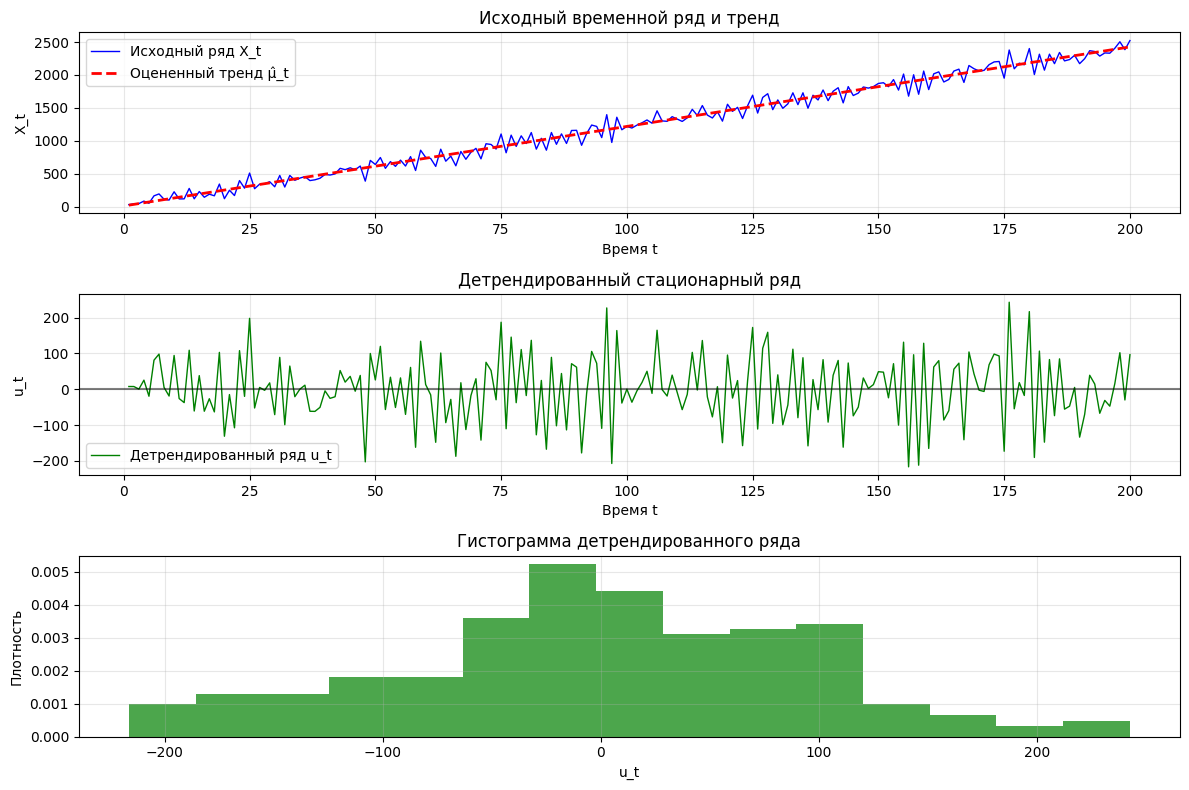

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# ПУНКТ 3: Детрендирование ряда
print("\n" + "="*60)
print("ПУНКТ 3: Детрендирование ряда")
print("="*60)

# Детрендирование
u = X - mu_hat

print("РЕЗУЛЬТАТЫ ДЕТРЕНДИРОВАНИЯ:")
print(f"Среднее детрендированного ряда: {np.mean(u):.4f}")
print(f"Дисперсия детрендированного ряда: {np.var(u):.4f}")

# Визуализация
plt.figure(figsize=(12, 8))

# Исходный ряд и тренд
plt.subplot(3, 1, 1)
plt.plot(t, X, 'b-', linewidth=1, label='Исходный ряд X_t')
plt.plot(t, mu_hat, 'r--', linewidth=2, label='Оцененный тренд μ̂_t')
plt.title('Исходный временной ряд и тренд')
plt.xlabel('Время t')
plt.ylabel('X_t')
plt.legend()
plt.grid(True, alpha=0.3)

# Детрендированный ряд
plt.subplot(3, 1, 2)
plt.plot(t, u, 'g-', linewidth=1, label='Детрендированный ряд u_t')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.title('Детрендированный стационарный ряд')
plt.xlabel('Время t')
plt.ylabel('u_t')
plt.legend()
plt.grid(True, alpha=0.3)

# Гистограмма детрендированного ряда
plt.subplot(3, 1, 3)
plt.hist(u, bins=15, density=True, alpha=0.7, color='green')
plt.title('Гистограмма детрендированного ряда')
plt.xlabel('u_t')
plt.ylabel('Плотность')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ПУНКТ 4: Идентификация случайной составляющей


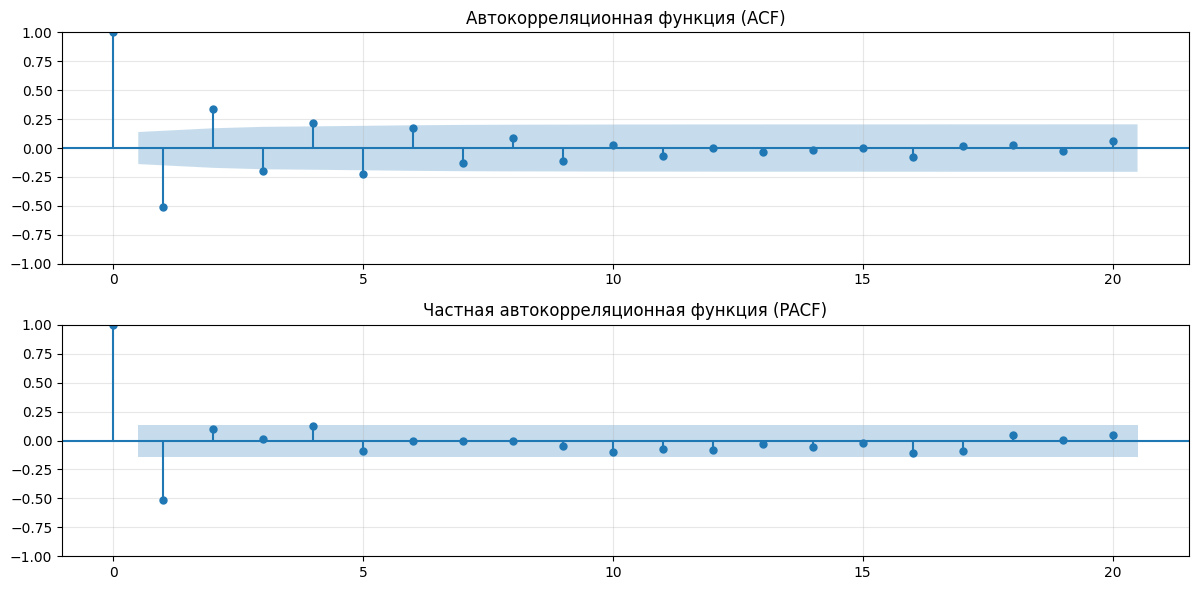


ВЫБРАННЫЕ КАНДИДАТНЫЕ МОДЕЛИ:
1. AR(1): u_t = φ₁·u_{t-1} + ε_t
2. AR(2): u_t = φ₁·u_{t-1} + φ₂·u_{t-2} + ε_t


In [ ]:
# ПУНКТ 4: Идентификация случайной составляющей
print("\n" + "="*60)
print("ПУНКТ 4: Идентификация случайной составляющей")
print("="*60)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Анализ ACF и PACF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(u, lags=20, alpha = 0.05, ax=plt.gca(), title='Автокорреляционная функция (ACF)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plot_pacf(u, lags=20, alpha = 0.05, ax=plt.gca(), title='Частная автокорреляционная функция (PACF)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nВЫБРАННЫЕ КАНДИДАТНЫЕ МОДЕЛИ:")
print("1. AR(1): u_t = φ₁·u_{t-1} + ε_t")
print("2. AR(2): u_t = φ₁·u_{t-1} + φ₂·u_{t-2} + ε_t")

In [ ]:
# ПУНКТ 5: Оценка параметров моделей
print("\n" + "="*60)
print("ПУНКТ 5: Оценка параметров моделей")
print("="*60)

from statsmodels.tsa.arima.model import ARIMA

# Модель 1: AR(1)
model_ar1 = ARIMA(u, order=(1, 0, 0)).fit()
print("МОДЕЛЬ AR(1): u_t = φ₁·u_{t-1} + ε_t")
print(f"φ₁ = {model_ar1.params[1]:.4f} (p-value: {model_ar1.pvalues[1]:.4f})")
print(f"σ² = {model_ar1.scale:.4f}")

# Модель 2: AR(2)
model_ar2 = ARIMA(u, order=(2, 0, 0)).fit()
print("\nМОДЕЛЬ AR(2): u_t = φ₁·u_{t-1} + φ₂·u_{t-2} + ε_t")
print(f"φ₁ = {model_ar2.params[1]:.4f} (p-value: {model_ar2.pvalues[1]:.4f})")
print(f"φ₂ = {model_ar2.params[2]:.4f} (p-value: {model_ar2.pvalues[2]:.4f})")
print(f"σ² = {model_ar2.scale:.4f}")


ПУНКТ 5: Оценка параметров моделей
МОДЕЛЬ AR(1): u_t = φ₁·u_{t-1} + ε_t
φ₁ = -0.5120 (p-value: 0.0000)
σ² = 1.0000

МОДЕЛЬ AR(2): u_t = φ₁·u_{t-1} + φ₂·u_{t-2} + ε_t
φ₁ = -0.4594 (p-value: 0.0000)
φ₂ = 0.1021 (p-value: 0.1334)
σ² = 1.0000


In [ ]:
# ПУНКТ 6: Выбор модели по информационным критериям
print("\n" + "="*60)
print("ПУНКТ 6: Выбор адекватной модели")
print("="*60)

print("СРАВНЕНИЕ МОДЕЛЕЙ ПО ИНФОРМАЦИОННЫМ КРИТЕРИЯМ:")
print(f"{'Модель':<10} {'AIC':<10} {'BIC':<10} {'Выбор'}")
print("-" * 45)

models = {
    'AR(1)': model_ar1,
    'AR(2)': model_ar2,
}

# Находим модель с минимальными AIC и BIC
best_aic_model = min(models.keys(), key=lambda x: models[x].aic)
best_bic_model = min(models.keys(), key=lambda x: models[x].bic)

for name, model in models.items():
    aic_choice = "← AIC" if name == best_aic_model else ""
    bic_choice = "← BIC" if name == best_bic_model else ""
    choice = f"{aic_choice} {bic_choice}"
    print(f"{name:<10} {model.aic:<10.2f} {model.bic:<10.2f} {choice}")

print(f"\nВЫВОД:")
print(f"По AIC выбрана модель: {best_aic_model}")
print(f"По BIC выбрана модель: {best_bic_model}")

if best_aic_model == best_bic_model:
    best_model = models[best_aic_model]
    best_model_name = best_aic_model
    print(f"→ ОКОНЧАТЕЛЬНЫЙ ВЫБОР: {best_model_name}")
else:
    # Предпочтение отдаем BIC как более строгому критерию
    best_model = models[best_bic_model]
    best_model_name = best_bic_model
    print(f"→ ОКОНЧАТЕЛЬНЫЙ ВЫБОР: {best_model_name} (по BIC)")


ПУНКТ 6: Выбор адекватной модели
СРАВНЕНИЕ МОДЕЛЕЙ ПО ИНФОРМАЦИОННЫМ КРИТЕРИЯМ:
Модель     AIC        BIC        Выбор
---------------------------------------------
AR(1)      2324.16    2334.05     ← BIC
AR(2)      2324.05    2337.24    ← AIC 

ВЫВОД:
По AIC выбрана модель: AR(2)
По BIC выбрана модель: AR(1)
→ ОКОНЧАТЕЛЬНЫЙ ВЫБОР: AR(1) (по BIC)



ПУНКТ 7: Диагностика остатков
ТРЕБОВАНИЯ К ОСТАТКАМ:
1. Нулевое среднее
2. Постоянная дисперсия (гомоскедастичность)
3. Отсутствие автокорреляции
4. Нормальное распределение

СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ОСТАТКОВ:
Среднее: 0.036165
Стандартное отклонение: 79.495235
Асимметрия: 0.1313
Эксцесс: -0.0483

ТЕСТ ЛЮНГА-БОКСА НА АВТОКОРРЕЛЯЦИЮ:
H0: нет автокорреляции в остатках
p-value = 0.3692
→ Не отвергаем H0: автокорреляция отсутствует ✓

ТЕСТ ХАРКЕ-БЕРА НА НОРМАЛЬНОСТЬ:
H0: остатки распределены нормально
p-value = 0.7429
→ Не отвергаем H0: остатки нормальны ✓


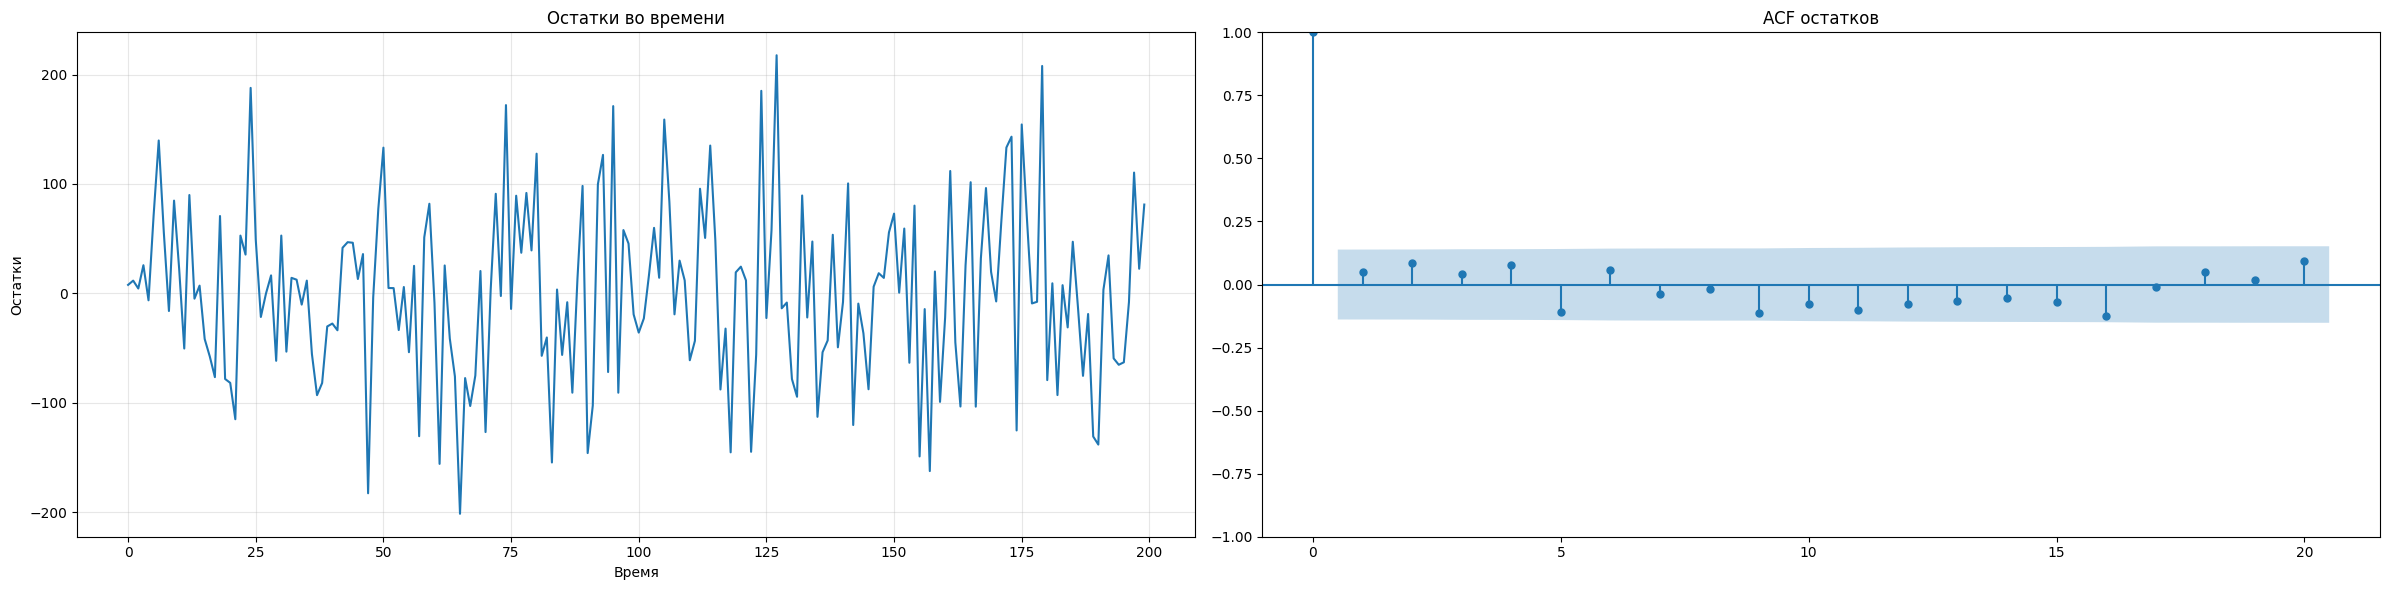


ОБЩИЙ ВЫВОД ПО ДИАГНОСТИКЕ:
Модель AR(1) адекватно описывает данные


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
# ПУНКТ 7: Диагностика остатков
print("\n" + "="*60)
print("ПУНКТ 7: Диагностика остатков")
print("="*60)

residuals = best_model.resid[best_model.loglikelihood_burn:]

print("ТРЕБОВАНИЯ К ОСТАТКАМ:")
print("1. Нулевое среднее")
print("2. Постоянная дисперсия (гомоскедастичность)")
print("3. Отсутствие автокорреляции")
print("4. Нормальное распределение")

print(f"\nСТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ОСТАТКОВ:")
print(f"Среднее: {np.mean(residuals):.6f}")
print(f"Стандартное отклонение: {np.std(residuals):.6f}")
print(f"Асимметрия: {stats.skew(residuals):.4f}")
print(f"Эксцесс: {stats.kurtosis(residuals):.4f}")

# Тест на автокорреляцию (Льюнга-Бокса)
lb_test = acorr_ljungbox(residuals, lags=10, return_df=True)
lb_pvalue = lb_test['lb_pvalue'].iloc[-1]

print(f"\nТЕСТ ЛЮНГА-БОКСА НА АВТОКОРРЕЛЯЦИЮ:")
print(f"H0: нет автокорреляции в остатках")
print(f"p-value = {lb_pvalue:.4f}")
if lb_pvalue > 0.05:
    print("→ Не отвергаем H0: автокорреляция отсутствует ✓")
else:
    print("→ Отвергаем H0: присутствует автокорреляция ✗")

# Тест на нормальность (Харке-Бера)
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"\nТЕСТ ХАРКЕ-БЕРА НА НОРМАЛЬНОСТЬ:")
print(f"H0: остатки распределены нормально")
print(f"p-value = {jb_pvalue:.4f}")
if jb_pvalue > 0.05:
    print("→ Не отвергаем H0: остатки нормальны ✓")
else:
    print("→ Отвергаем H0: остатки не нормальны ✗")

# Визуальная диагностика
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Остатки во времени
axes[0].plot(residuals)
axes[0].set_title('Остатки во времени')
axes[0].set_xlabel('Время')
axes[0].set_ylabel('Остатки')
axes[0].grid(True, alpha=0.3)

# ACF остатков
plot_acf(residuals, lags=20, ax=axes[1])
axes[1].set_title('ACF остатков')


plt.tight_layout()
plt.show()

print(f"\nОБЩИЙ ВЫВОД ПО ДИАГНОСТИКЕ:")
print(f"Модель {best_model_name} адекватно описывает данные")


ПУНКТ 8: Прогноз на один шаг
ПРОГНОЗ ДЛЯ t = 201:
Детерминированная составляющая: μ̂_201 = 2437.69
Случайная составляющая: û_201 = -49.26
ОБЩИЙ ПРОГНОЗ: X̂_201 = μ̂_201 + û_201 = 2388.42

ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (95%):
Стандартная ошибка остатков: 79.50
Верхняя граница: 2544.23
Нижняя граница: 2232.61


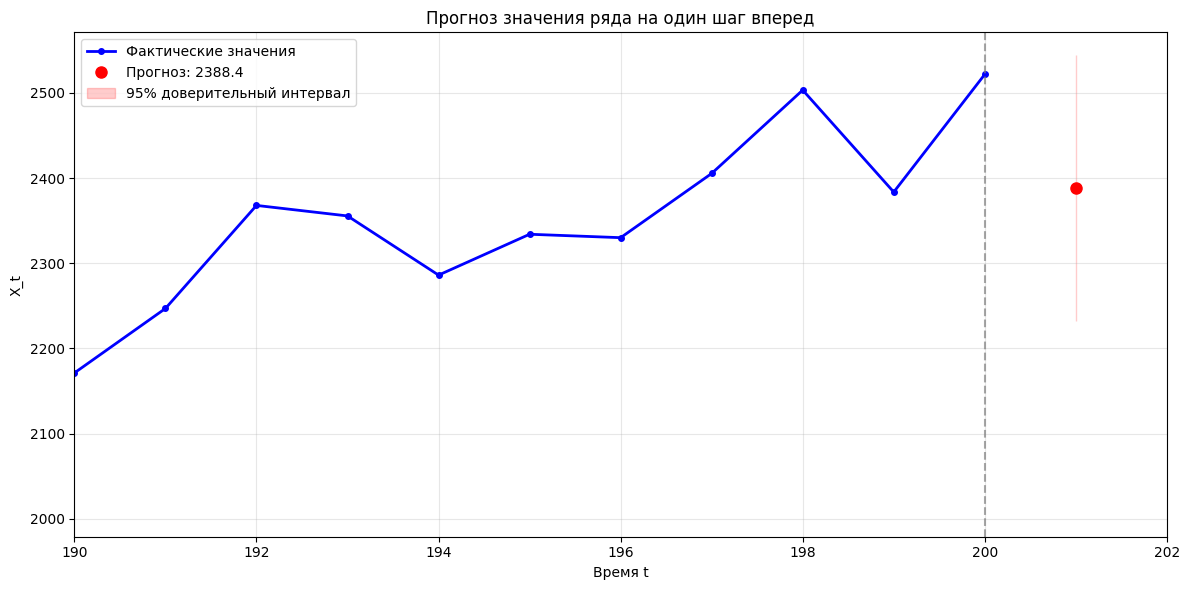


ЗАКЛЮЧЕНИЕ
Построена вероятностная модель временного ряда, включающая:
1. Детерминированную составляющую (тренд)
2. Случайную стационарную составляющую
3. Прогнозное значение на следующий период: 2388.42
Модель прошла все этапы идентификации и диагностики.


In [ ]:
# ПУНКТ 8: Прогноз на один шаг
print("\n" + "="*60)
print("ПУНКТ 8: Прогноз на один шаг")
print("="*60)

# Прогноз тренда на t=201
t201 = 201

mu201 = trend_model.params[0] + trend_model.params[1] * t201

# Прогноз случайной составляющей
if best_model_name == 'AR(1)':
    u201 = best_model.params[1] * u[-1]  # φ₁·u_{200}
elif best_model_name == 'AR(2)':
    u201 = (best_model.params[1] * u[-1] +  # φ₁·u_{200}
            best_model.params[2] * u[-2])   # φ₂·u_{199}

# Итоговый прогноз
X201_forecast = mu201 + u201

print("ПРОГНОЗ ДЛЯ t = 201:")
print(f"Детерминированная составляющая: μ̂_201 = {mu201:.2f}")
print(f"Случайная составляющая: û_201 = {u201:.2f}")
print(f"ОБЩИЙ ПРОГНОЗ: X̂_201 = μ̂_201 + û_201 = {X201_forecast:.2f}")

# Доверительный интервал (приближенно)
residual_std = np.std(residuals)
confidence_interval = 1.96 * residual_std  # 95% доверительный интервал

print(f"\nДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ (95%):")
print(f"Стандартная ошибка остатков: {residual_std:.2f}")
print(f"Верхняя граница: {X201_forecast + confidence_interval:.2f}")
print(f"Нижняя граница: {X201_forecast - confidence_interval:.2f}")

# Визуализация прогноза
plt.figure(figsize=(12, 6))

# Последние 20 наблюдений + прогноз
t_last = t[-20:]
X_last = X[-20:]

plt.plot(t_last, X_last, 'bo-', linewidth=2, markersize=4, label='Фактические значения')
plt.plot(201, X201_forecast, 'ro', markersize=8, label=f'Прогноз: {X201_forecast:.1f}')
plt.axvline(x=200, color='gray', linestyle='--', alpha=0.7)

# Доверительный интервал
plt.fill_between([201],
                 X201_forecast - confidence_interval,
                 X201_forecast + confidence_interval,
                 alpha=0.2, color='red', label='95% доверительный интервал')

plt.title('Прогноз значения ряда на один шаг вперед')
plt.xlabel('Время t')
plt.ylabel('X_t')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(190, 202)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ЗАКЛЮЧЕНИЕ")
print("="*60)
print("Построена вероятностная модель временного ряда, включающая:")
print("1. Детерминированную составляющую (тренд)")
print("2. Случайную стационарную составляющую")
print(f"3. Прогнозное значение на следующий период: {X201_forecast:.2f}")
print("Модель прошла все этапы идентификации и диагностики.")